## Visualisation

In [0]:
simplified_dataset_url = "https://raw.githubusercontent.com/vishal-pandey/ml-and-ds/master/datasets/delhi_weather_simplified.csv"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
df1 = pd.read_csv(simplified_dataset_url)

In [0]:
df1['datetime_utc'] = pd.to_datetime(df1['datetime_utc'])
df1.set_index('datetime_utc', inplace= True)

In [19]:
df1

,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm
datetime_utc,,,,,,,,
1996-11-01,11.666667,0.000000,0.0,52.916667,-2659.666667,0.0,0.0,22.333333
1996-11-02,10.458333,0.000000,0.0,48.625000,1009.833333,0.0,0.0,22.916667
1996-11-03,12.041667,0.000000,0.0,55.958333,1010.500000,0.0,0.0,21.791667
1996-11-04,10.222222,0.000000,0.0,48.055556,1011.333333,0.0,0.0,22.722222
1996-11-05,8.200000,0.000000,0.0,29.400000,1011.800000,0.0,0.0,27.800000
...,...,...,...,...,...,...,...,...
2016-11-26,8.250000,0.000000,0.0,33.750000,1013.250000,0.0,0.0,23.937500
2016-11-27,7.409091,0.000000,0.0,33.636364,1013.590909,0.0,0.0,23.636364
2016-11-28,6.222222,0.000000,0.0,32.500000,-210.500000,0.0,0.0,23.666667


In [20]:
df1.columns

Index([' _dewptm', ' _fog', ' _hail', ' _hum', ' _pressurem', ' _rain',
       ' _snow', ' _tempm'],
      dtype='object')

In [0]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [22]:
np.array([df1.index.values, df1[' _tempm'].values]).shape

(2, 7335)

### Seeing shape of the time series data spread

By seeing the shape of the shape of the temperature spread over the years we can conclude that there is pattern in the temperature over the year every year which we can model

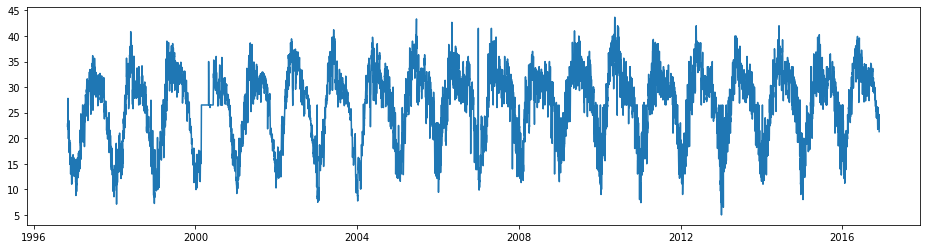

In [23]:
plt.figure(figsize=(16, 4))
plt.plot(df1.index.values[:], df1[' _tempm'].values[:])
plt.show()

### Histogram Plot
Plot of histogram and density shows a distribution that looks strongly Gaussian. A well behaved distribution is favourable for linear time series forcasting.

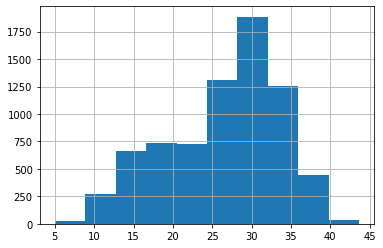

In [24]:
df1[' _tempm'].hist()
plt.show()

### Density Plot

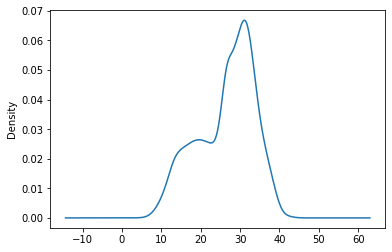

In [25]:
df1[' _tempm'].plot(kind='kde')
plt.show()

### Box and Whisker Plots by Year

This show a common trend every year and average temperature of every year is more or less same.



In [0]:
groups = df1[' _tempm'][426:-337].groupby(pd.Grouper(freq='A'))

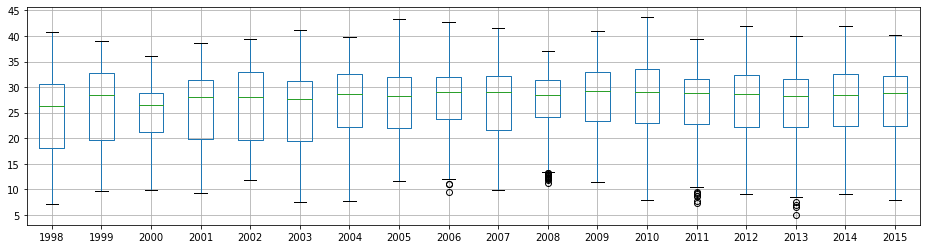

In [27]:
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values[:363]
  
plt.figure(figsize=(16, 4))
years.boxplot()

plt.show()

### Box and Whisker Plots by Month

This shows that months from march to october show high temperature and others months show lower average temperature which means March to October are summers and November to Feb are winters in delhi.

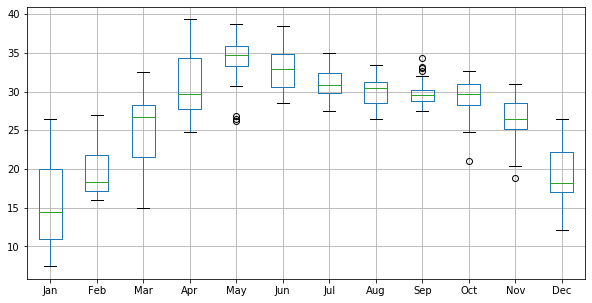

In [28]:
one_year = df1[' _tempm'][426:-337]['2011']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(0,12)
plt.figure(figsize=(10, 5))
months.boxplot()
plt.xticks(np.arange(1, len(month_names)+1, 1), month_names)
plt.show()

### Heat map
Heat map also proves that the point that "months from march to october show high temperature and others months show lower average temperature which means March to October are summers and November to Feb are winters in delhi". It helps to more clearly visualise this fact.

In [0]:
groups = df1[' _tempm'][426:-337].groupby(pd.Grouper(freq='M'))

In [0]:
years = pd.DataFrame()
tee = []

for name, group in groups:
  tee.append(np.mean(group.values))
  if name.month == 12:
    years[name.year] = tee
    tee = []

In [0]:
years.set_index([pd.Index(month_names)], inplace=True)

In [32]:
years

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Jan,13.165094,12.188394,13.769354,12.598292,14.076802,12.209001,13.106573,14.851267,16.628571,14.828149,16.397149,17.499501,15.140967,15.306097,14.628879,14.956741,15.233363,14.155837
Feb,16.487370,16.546405,17.774499,18.312059,17.415484,17.815335,18.433114,17.865094,24.636905,19.936097,18.932184,20.961777,21.085185,19.628392,17.354310,19.214276,18.310374,21.331845
Mar,19.607010,22.466220,26.504491,23.497021,24.484348,23.478983,26.624407,25.289708,25.750730,23.696621,27.551382,26.995200,29.982796,25.207258,24.954455,24.111751,23.186444,23.622389
Apr,29.170242,31.055370,26.787674,29.852883,32.021386,31.739674,31.835351,30.354087,32.483175,32.941270,30.382579,31.682222,36.311111,31.122540,30.123095,30.600992,29.579325,29.334912
May,34.255518,34.610969,26.488217,32.973339,35.436938,34.835201,34.305240,34.475346,34.254455,33.128255,31.370929,33.878226,36.393856,34.084438,35.350691,35.663978,32.650538,34.551575
Jun,32.949113,34.268502,30.559636,31.008985,34.245455,35.574871,33.072816,35.374921,32.877103,33.628373,30.471468,35.710952,35.814603,33.092646,36.737937,32.936310,35.707857,33.420595
Jul,30.217874,32.043975,30.270253,30.968143,35.403720,30.335047,33.289478,30.980722,31.439977,31.817512,31.028264,33.240591,31.577611,31.051037,32.263748,31.245123,32.769212,30.695276
Aug,29.236690,32.905591,28.700758,31.147548,30.593663,29.979557,29.675243,32.056144,30.959716,30.998532,30.322265,31.588940,29.784536,30.115429,29.766283,30.042934,32.444261,30.354631
Sep,29.488596,30.795494,30.178836,31.198280,28.307305,28.949728,31.709914,29.663730,30.367729,31.063214,30.259762,30.689167,28.739277,29.747778,30.726349,31.008889,31.162976,31.784603
Oct,25.138897,27.617414,28.204807,27.685409,27.188801,26.442551,27.743983,28.858499,29.292557,28.643540,29.376634,29.053763,28.770720,29.205350,29.283077,28.414020,29.268859,29.989094


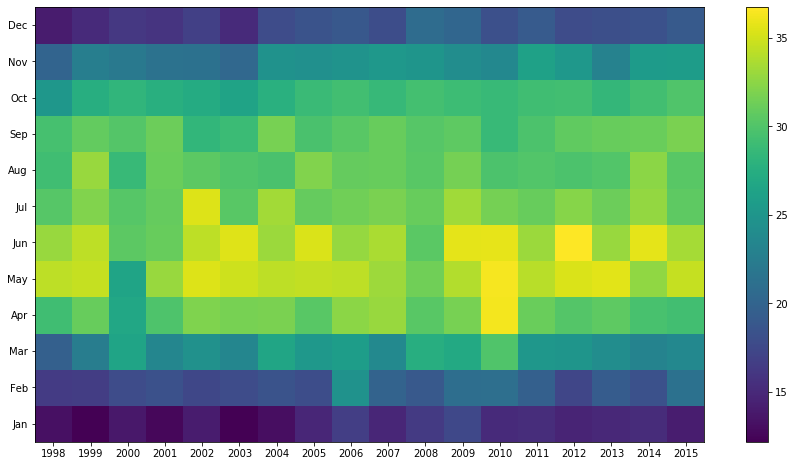

In [33]:
plt.figure(figsize=(15, 8))
plt.pcolor(years)
plt.yticks(np.arange(0.5, len(years.index), 1), years.index)
plt.xticks(np.arange(0.5, len(years.columns), 1), years.columns)
plt.colorbar();
plt.show()

### Time Series Lag Scatter Plots

Time series modeling assumes a relationship between an observation and the previous observation. Since points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship. Which shows the we can better time series model it.

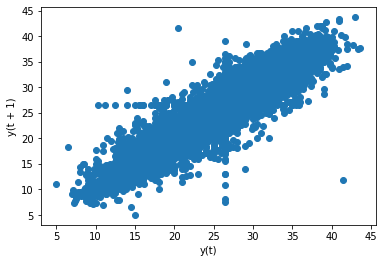

In [34]:
pd.plotting.lag_plot(df1[' _tempm'])
plt.show()